<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis 

## Table of Contents

- 1. [Problem Statement](#section1)</br>
- 2. [Data Description and Loading](#section2)</br>
    - 2.1[Importing Packages](#section201)</br>
    - 2.2[Loading data](#section202)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Processing Duplicate Rows](#section401)<br/>
    - 4.2 [Dealing with high cardinality](#section402)<br/>
    - 4.3 [Dealing with Null (NaN) values](#section403)<br/>
    - 4.4 [Dealing with Zero](#section404)<br/>
- 5. [Questions and data visualizations] (#section5) </br>  
    - 5.1 [Which are the top 10 car brands - sold](#section501)</br>
    - 5.2 [Price distribution comparision on top 2 brands](#section502)</br>
    - 5.3 [Mileage distribution comparision on top 2 brands](#section503)</br>
    - 5.4 [which cars are sold more based on Body design, drive, Engine Type ?](#section504)</br>
    - 5.5 [Percentage Share by body, drive, engType](#section505)</br>
    - 5.6 [How is prices growing over years ?](#section506)</br>
    - 5.7 [How is data spread based on price and mileage](#section507)</br>
    - 5.8 [Understand sales trend over years](#section508)</br>
    - 5.9 [Comparing top 2 brands sales over years](#section509)</br>
    - 5.10 [Understanding co-relation](#section510)</br>
    - 5.11 [How is price dependent by 'Body Design'?](#section511)</br>
    - 5.12 [How is Mileage changing by Engine Type ??](#section512)</br>
    - 5.13 [Price, year, Mileage ranges and outliers detection?](#section513)</br>
    - 5.14 [Closer look at Price, mileage and sales year distribution and ranges](#section514)</br>
    - 5.15 [How is 'Volkswagen' sales distributed by Drive\ Body design and Engine Type?](#section515)</br>
    - 5.16 [ 5.16 How is 'Volkswagen' mileage distributed by Body design\ Engine Type?](#section516)</br>
- 6. [Conclusions](#section5)<br/>  

<a id=section1></a> 
### 1. Problem Statement

To do Exploratory Data Analysis and get insights on the CarSales dataset provided by INSAID.

This dataset contains data for more than 9.5K cars 

* __Exploratory Data Analysis__ <br/>
    - Data Processing, Identifying anamolies and normalization
    - Exploring Data to get insights 
       - On Sales pattern
       - Sales trend over years
       - Inter relation between variables for better mileage
       - Recommendation based on sales


<a id=section2></a> 
### 2. Data Description and Loading

The dataset is about car sales. It comprises of __9576 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| car           | Manufacturer Brand                                        | 
| price         | Selling Price of the car (in USD)                         |  
| body          | Car Body Design                                           | 
| mileage       | Distance travelled (‘000 Km)                              |   
| engV          | Rounded Engine Volume (‘000 cubic cm)                     |
| engType       | Type of the fuel supported by Engine                      |
| registration  | Whether car is registered                                 |
| year          | Sold year                                                 |
| model         | Specific model name                                       |
| drive         | Drive type                                                |


<a id=section201></a> 
### 2.1 Importing packages     

In [23]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

<a id=section202></a> 
### 2.2 Loading Data

In [24]:
#Defining car sales dataframe
cars_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='latin-1')

<a id=section3></a> 
## 3. Data Profiling

- Reviewing Data set to understand the datatype, variables and how to dela with it

<a id=section301></a> 

In [25]:
cars_df.dtypes                                                                       # Display the data type for each variable

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section302></a> 

In [7]:
# sample data
cars_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [8]:
cars_df.shape

(9576, 10)

<a id=section303></a> 

In [96]:
cars_df.describe(include = 'all')


,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


<a id=section304></a> 

In [10]:
cars_df.sample(5)


,car,price,body,mileage,engV,engType,registration,year,model,drive
4520,Smart,5000.0,hatch,102,0.7,Petrol,yes,2005,Fortwo,rear
2269,Mazda,5850.0,sedan,270,2.0,Petrol,yes,2003,6,front
6793,Daewoo,2900.0,sedan,138,NaN,Other,yes,2007,Nexia,front
6479,Toyota,22900.0,sedan,84,2.5,Petrol,yes,2012,Camry,front
5875,Volkswagen,12300.0,other,248,1.9,Diesel,yes,2010,T5 (Transporter) ïàññ.,front


<a id=section305></a> 

In [97]:
profile = pandas_profiling.ProfileReport(cars_df)
profile.to_file(outputfile="car_sales_before_preprocessing.html")

<a id=section306></a> 
#### Initial Observations
* ___Dataset info (Before PreProcessing)___

    - Number of variables	__10__
    - Number of observations	__9576__
    - Total Missing (%)	__1.0%__
    - Total size in memory	__748.2 KiB__
    - Average record size in memory	__80.0 B__<br/>


* ___Variables types___

    - Numeric	__4__
    - Categorical	__6__
    - Boolean	__0__
    - Date	__0__
    - Text (Unique)	__0__
    - Rejected	__0__
    - Unsupported	__0__ <br/><br/>

* ___Warnings___

    - __car__ has a high cardinality: __87__ distinct values ___(Warning)___
    - __drive__ has __511__ / __5.3%__ missing values ___(Missing)___
    - __engV__ has __434__ / __4.5%__ missing values ___(Missing)___
    - __mileage__ has __348__ / __3.6%__ zeros ___(Zeroes)___
    - __model__ has a high cardinality: __888__ distinct values ___(Warning)___
    - __price__ has __267__ / __2.8%__ zeros ___(Zeros)___
    - __Dataset__ has __113 duplicate rows__ ___(Warning)___

<a id=section4></a> 
## 4. Data Normalization

<a id=section401></a> 
### 4.1 Processing Duplicate Rows (113 Duplicate Rows found)

In [26]:
# Identifying duplicated rows in a dedicated column 'is_duplicate'
cars_df["is_duplicate"]= cars_df.duplicated()
cars_df.sample(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive,is_duplicate
1809,Peugeot,28000.0,other,32,1.6,Petrol,yes,2013,RCZ,front,False
973,Honda,13000.0,sedan,119,2.4,Other,yes,2008,Accord,front,False
8861,Hyundai,11999.0,vagon,55,1.6,Diesel,yes,2012,i30,front,False
4825,Volkswagen,6600.0,hatch,136,1.4,Gas,yes,2001,Golf IV,front,False
7447,Mitsubishi,6300.0,sedan,126,1.6,Petrol,yes,2006,Lancer,front,False


In [27]:
cars_df[cars_df.is_duplicate == True].count()

car             113
price           113
body            113
mileage         113
engV            113
engType         113
registration    113
year            113
model           113
drive           112
is_duplicate    113
dtype: int64

In [28]:
#Removing duplicate rows by keeping first copy and assigning into cars_df_Without_duplicates data frame
cars_df_Without_duplicates = cars_df.drop_duplicates(keep='first',inplace= False)

In [29]:
cars_df_Without_duplicates.count()

car             9551
price           9551
body            9551
mileage         9551
engV            9117
engType         9551
registration    9551
year            9551
model           9551
drive           9040
is_duplicate    9551
dtype: int64

In [30]:
#cross checking for duplicates in the cleaned dataset 
cars_df_Without_duplicates[cars_df_Without_duplicates.duplicated()]

,car,price,body,mileage,engV,engType,registration,year,model,drive,is_duplicate


In [31]:
#88 rows which were identified as duplicates first row is been retained
cars_df_Without_duplicates.groupby('is_duplicate').count()

,car,price,body,mileage,engV,engType,registration,year,model,drive
is_duplicate,,,,,,,,,,
False,9463,9463,9463,9463,9029,9463,9463,9463,9463,8953
True,88,88,88,88,88,88,88,88,88,87


In [32]:
#re-assigning without duplicates dataframe to cars_df
cars_df = cars_df_Without_duplicates
cars_df.groupby('is_duplicate').count()

,car,price,body,mileage,engV,engType,registration,year,model,drive
is_duplicate,,,,,,,,,,
False,9463,9463,9463,9463,9029,9463,9463,9463,9463,8953
True,88,88,88,88,88,88,88,88,88,87


In [33]:
#Dropping is_duplicate column after removing all duplicate rows
cars_df.drop('is_duplicate', axis=1, inplace=True)

<a id=section402></a> 
### 4.2  Dealing with high cardinality

 - __cars__ has __87__ distinct values, cars with sales < 200 are considered as 'Other'

In [34]:
cars_df['car'].value_counts().head(10)

Volkswagen       935
Mercedes-Benz    907
BMW              693
Toyota           538
VAZ              489
Renault          468
Audi             457
Opel             400
Skoda            368
Nissan           367
Name: car, dtype: int64

In [35]:
#if the count of cars per brand is < 200, consider it as 'other' and assign it to a new column 'car_new'
def car_category(vcar):
    df = cars_df.loc[cars_df['car'] == vcar].count().car
    if df < 200:
        return 'other'
    else: 
        return vcar

cars_df['car_new'] = cars_df['car'].apply(car_category)

In [36]:
cars_df['car_new'].unique() # 18 unique values found

array(['Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'other', 'Volkswagen', 'Audi', 'Mitsubishi', 'Kia', 'Toyota',
       'Hyundai', 'Opel', 'Chevrolet', 'Skoda', 'Daewoo', 'VAZ'],
      dtype=object)

<a id=section403></a> 
### 4.3 Dealing with Null (NaN) values

- __drive__ has __511__ / __5.3%__ missing values ___(Missing)___
- __engV__ has __434__ / __4.5%__ missing values ___(Missing)___

In [37]:
cars_df.isnull().sum()


car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
car_new           0
dtype: int64

In [38]:
#Drive has 511 Nan, replace Nan with the mode of drive
cars_df['drive_new'] = cars_df['drive']

In [39]:
cars_df['drive_new'].fillna(cars_df['drive'].mode()[0],inplace=True)

__Processing engV__

In [40]:
#EngV has 434 Nan, replace Nan with mode of Engv
cars_df['engV_new'] = cars_df['engV']

In [41]:
cars_df.loc[cars_df['engV'] > 5].count()

car             238
price           238
body            238
mileage         238
engV            238
engType         238
registration    238
year            238
model           238
drive           221
car_new         238
drive_new       238
engV_new        238
dtype: int64

In [42]:
#EngV has outliers and high cadinality, so those with engv>5(238 rows) is replaced with 'other', 
#we are also converting the datatype from Numeric to string as it is a categorical variable
def engV_Clean(vengV):
    if vengV > 5.0:
        return 'other'
    else: 
        return str(vengV)
    
cars_df['engV_new'] = cars_df['engV_new'].apply(engV_Clean)    

In [43]:
cars_df['engV_new'].unique().size

79

In [44]:
cars_df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
car_new           0
drive_new         0
engV_new          0
dtype: int64

<a id=section404></a> 
### 4.4 Dealing with Zero 

__price__, __256__ / __2.8%__  (Zeroes)

In [45]:
cars_df[cars_df['price'] == 0].count()

car             256
price           256
body            256
mileage         256
engV            247
engType         256
registration    256
year            256
model           256
drive           237
car_new         256
drive_new       256
engV_new        256
dtype: int64

In [46]:
cars_df.groupby('price').count().head()


,car,body,mileage,engV,engType,registration,year,model,drive,car_new,drive_new,engV_new
price,,,,,,,,,,,,
0.00,256,256,256,247,256,256,256,256,237,256,256,256
259.35,1,1,1,1,1,1,1,1,1,1,1,1
280.00,1,1,1,1,1,1,1,1,1,1,1,1
350.00,1,1,1,0,1,1,1,1,0,1,1,1
370.50,1,1,1,1,1,1,1,1,1,1,1,1


In [47]:
#copying the price to a new column price_column and apply changes on price_new
cars_df['price_new'] = cars_df['price']

In [48]:
cars_df.corr()

,price,mileage,engV,year,price_new
price,1.000000,-0.313003,0.050587,0.371752,1.000000
mileage,-0.313003,1.000000,0.047645,-0.494191,-0.313003
engV,0.050587,0.047645,1.000000,-0.042645,0.050587
year,0.371752,-0.494191,-0.042645,1.000000,0.371752
price_new,1.000000,-0.313003,0.050587,0.371752,1.000000


In [49]:
#As price has a highest co-relation with year, lets replace zeroes with the mean of price grouped by car,year,engType,drive_new
def price_Clean(vcar,vyear,vengtype,vdrive, vprice):
    if vprice == 0:
        df = cars_df.loc[(cars_df['car_new'] == vcar) \
                         & (cars_df['year'] == vyear) \
                            & (cars_df['engType'] == vengtype) \
                               & (cars_df['drive_new'] == vdrive)].price.mean()
        return df
    else: 
        return vprice
    
cars_df['price_new'] = cars_df.apply(lambda x: price_Clean(x['car_new'], x['year'],x['engType'],x['drive_new'], x['price']), axis=1)


In [50]:
#dropping price column to avoid rejected in analysis as it created a strong co-relation
cars_df.drop('price', axis=1, inplace=True)

#### mileage has 335 / 3.6% zeros 

In [52]:
cars_df[cars_df['mileage'] == 0].count()

car             335
body            335
mileage         335
engV            316
engType         335
registration    335
year            335
model           335
drive           322
car_new         335
drive_new       335
engV_new        335
price_new       335
dtype: int64

In [53]:
#Replace zeros with the mean on mileage grouped by car,engType,drive
def mileage_Clean(vcar,vengType,vdrive,vmileage):
    if vmileage == 0:
        df = cars_df.loc[(cars_df['car'] == vcar) & (cars_df['engType'] == vengType)&(cars_df['drive'] == vdrive)].mileage.mean()
        return df
    else: 
        return vmileage
    
cars_df['mileage_new'] = cars_df.apply(lambda x: mileage_Clean(x['car_new'], x['engType'],x['drive_new'],x['mileage']), axis=1)



In [54]:
cars_df[cars_df['mileage_new'] == 0].count()

car             0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
car_new         0
drive_new       0
engV_new        0
price_new       0
mileage_new     0
dtype: int64

In [55]:
cars_df.drop('mileage', axis=1, inplace=True)

In [56]:
cars_df.drop('car', axis=1, inplace=True)

In [57]:
cars_df.drop('drive', axis=1, inplace=True)

In [58]:
cars_df.drop('engV', axis=1, inplace=True)

In [59]:
post_profile = pandas_profiling.ProfileReport(cars_df)
post_profile.to_file(outputfile="Car_sales_post_profiling.html")

-  We ignore __model__ in our analysis due to very high cardinality 

<a id=section5></a> 
## 5. Questions and data visualizations

<a id=section501></a> 
### 5.1 Which are the top 10 car brands - sold

In [42]:
plt.rcParams['figure.figsize'] = (10,5)


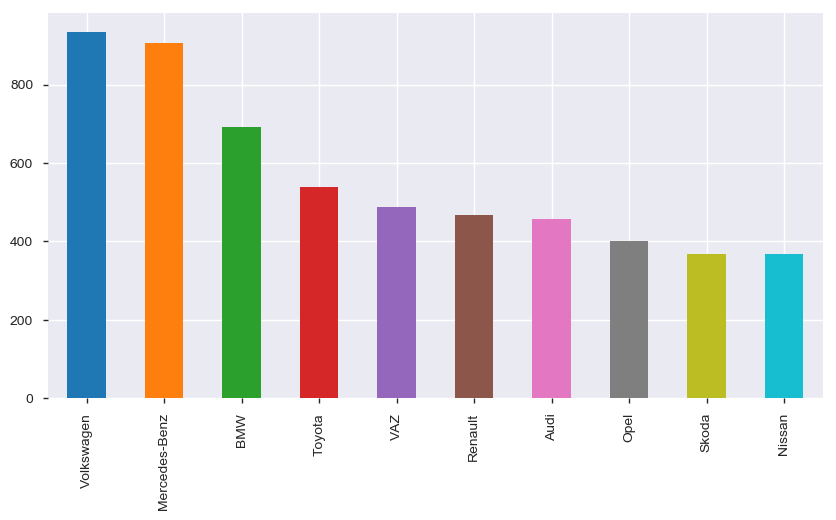

In [44]:
data_vc = cars_df[cars_df['car_new'] != 'other']
#data_vc.head()
data_vc['car_new'].value_counts().head(10).plot.bar()

- __Volkswagen__ and __Mercedes-Benz__ are the top brands sold and close competators

<a id=section502></a> 
#### 5.2 Price distribution comparision on top 2 brands

Text(0.5,1,'Price distribution using FacetGrid')

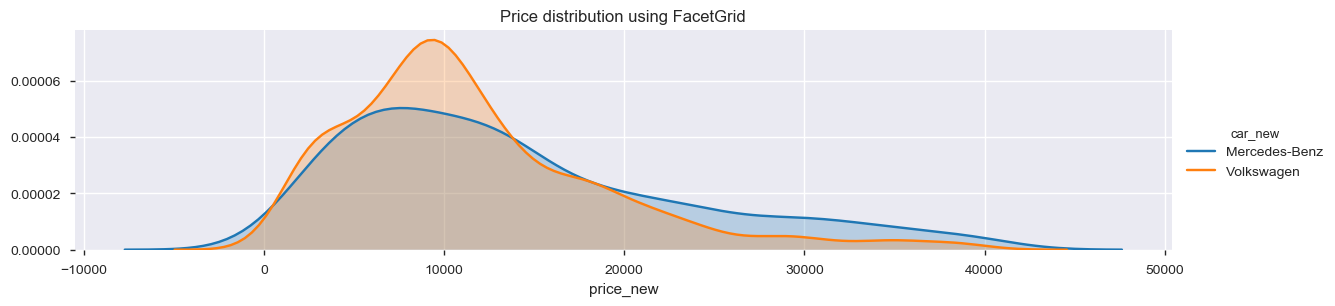

In [54]:
# Prices less than 40000 is considered to remove the outliers 
TopBrands = cars_df[(cars_df['car_new'].isin (['Mercedes-Benz','Volkswagen'])) & (cars_df['price_new'] < 40000) ]  
as_fig = sns.FacetGrid(TopBrands,hue='car_new',aspect=4)
as_fig.map(sns.kdeplot,'price_new',shade=True)

as_fig.add_legend()
plt.title('Price distribution using FacetGrid')


<a id=section503></a> 
#### 5.3 Mileage distribution comparision on top 2 brands

Text(0.5,1,'Mileage distribution using FacetGrid')

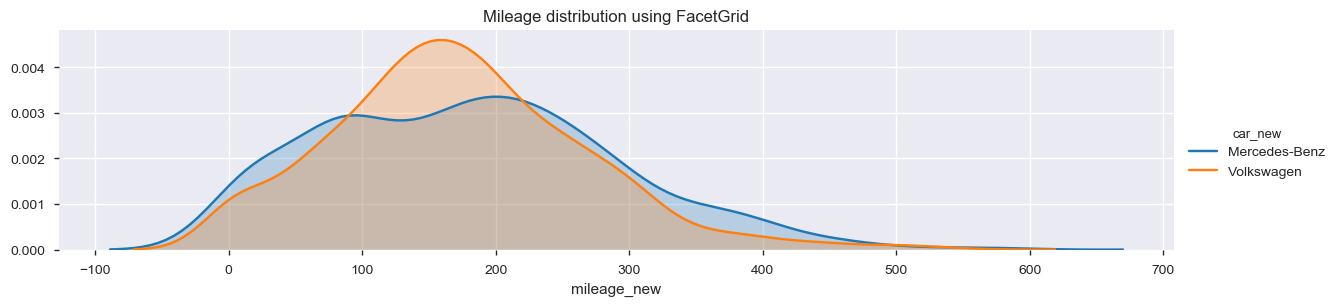

In [56]:
# Mileage < 600 is considered to give the clear picuture and remove outliers
TopBrands = cars_df[(cars_df['car_new'].isin (['Mercedes-Benz','Volkswagen'])) & (cars_df['mileage_new'] < 600) ] 
as_fig = sns.FacetGrid(TopBrands,hue='car_new',aspect=4)
as_fig.map(sns.kdeplot,'mileage_new',shade=True)

as_fig.add_legend()
plt.title('Mileage distribution using FacetGrid')


<a id=section504></a> 
#### 5.4 which cars are sold more based on Body design, drive, Engine Type ?

Text(0.5,1,'[EngType].')

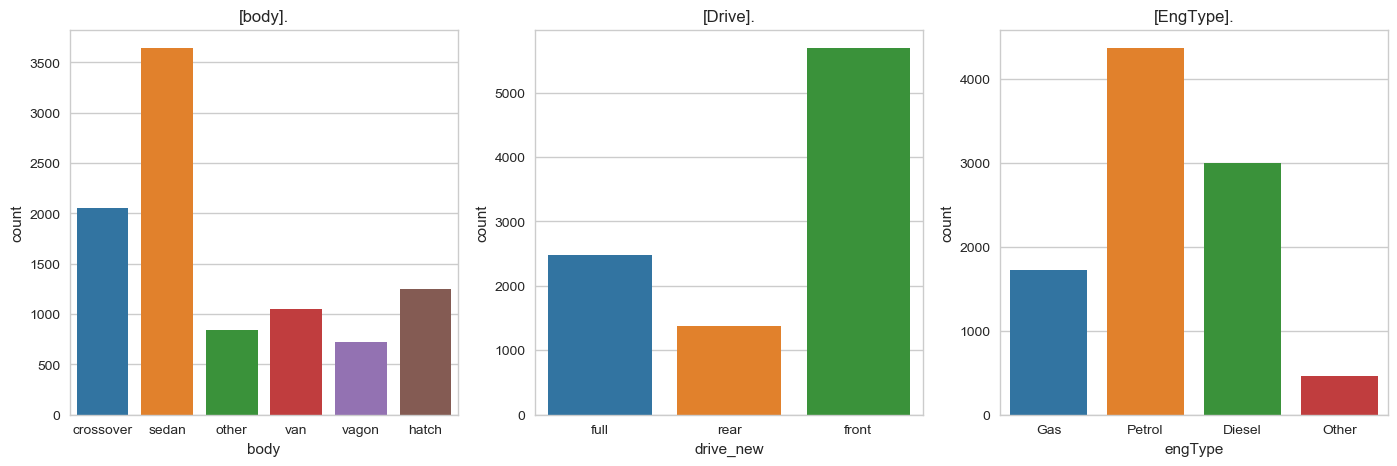

In [48]:
fig, axes = plt.subplots(ncols=3, figsize=(17,5))
sns.set_style('whitegrid')
sns.countplot(x='body', data=cars_df,ax = axes[0]).set_title('[body].')
sns.countplot(x='drive_new', data=cars_df,ax = axes[1]).set_title('[Drive].')
sns.countplot(x='engType', data=cars_df,ax = axes[2]).set_title('[EngType].')

<a id=section505></a> 
#### 5.5 Percentage Share by body, drive, engType

Text(0.5,1,'Engine Type')

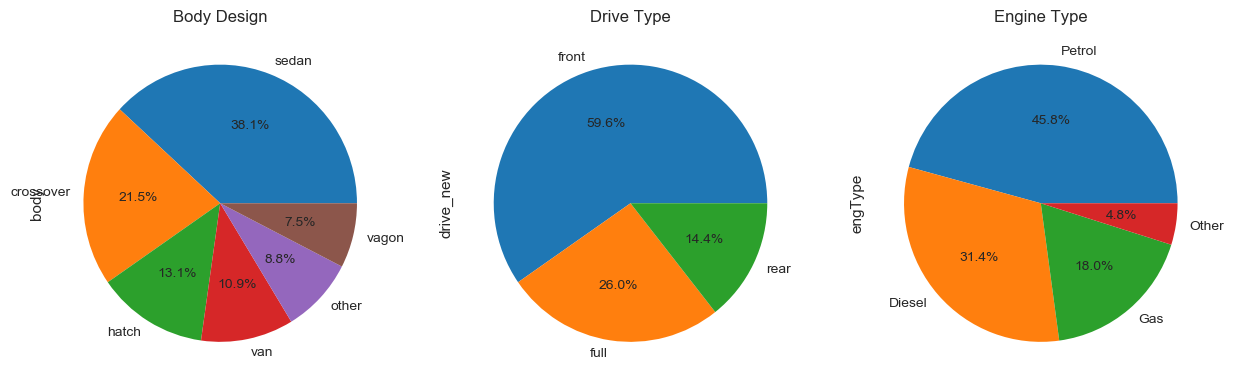

In [85]:
f,ax = plt.subplots(1,3,figsize=(15,4.5))
cars_df['body'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
cars_df['drive_new'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
cars_df['engType'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2])
ax[0].set_title('Body Design')
ax[1].set_title('Drive Type')
ax[2].set_title('Engine Type')

 - __Sedan__ , __Front__ drive, __Petrol__ variant cars has higher sales percentage
 

<a id=section506></a> 
#### 5.6 How is prices growing over years ?

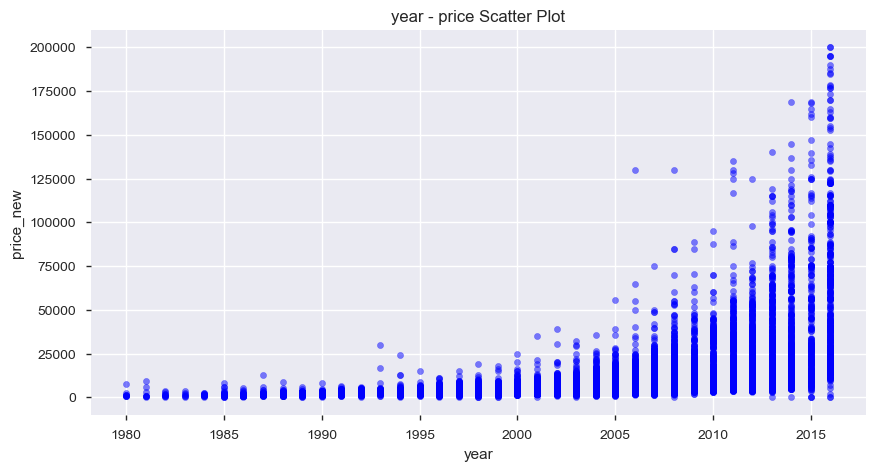

In [87]:
#reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')
cars_df[(cars_df['price_new'] < 200000) & (cars_df['year'] >= 1980) ].plot(kind = 'scatter', x='year', y = 'price_new', alpha = 0.5, color = 'b')
plt.xlabel("year")
plt.ylabel("price_new")
plt.title("year - price Scatter Plot")
plt.show()

#### Prices are growing exponentially over years

<a id=section507></a>
### 5.7 How is data spread based on price and mileage ? 

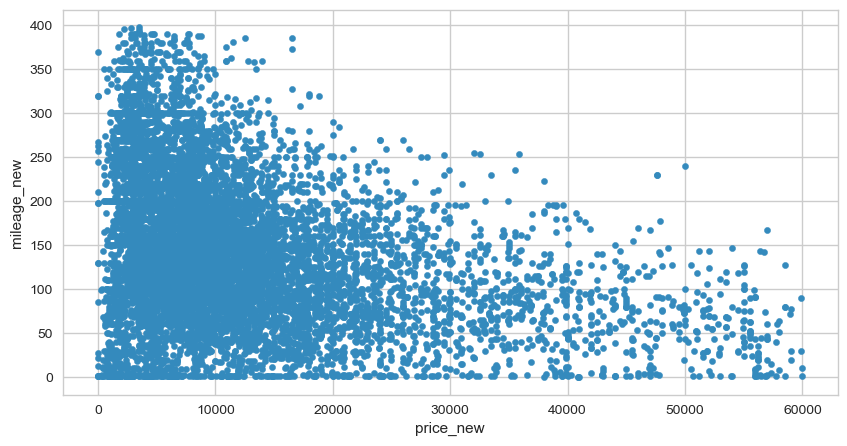

In [113]:
cars_df[(cars_df['price_new'] < 60000) & (cars_df['mileage_new'] < 400)].plot.scatter(x='price_new', y='mileage_new')


<a id=section508></a>
### 5.8 Understand sales trend over years

Text(0.5,1,'Count plot for cars_df[Year].')

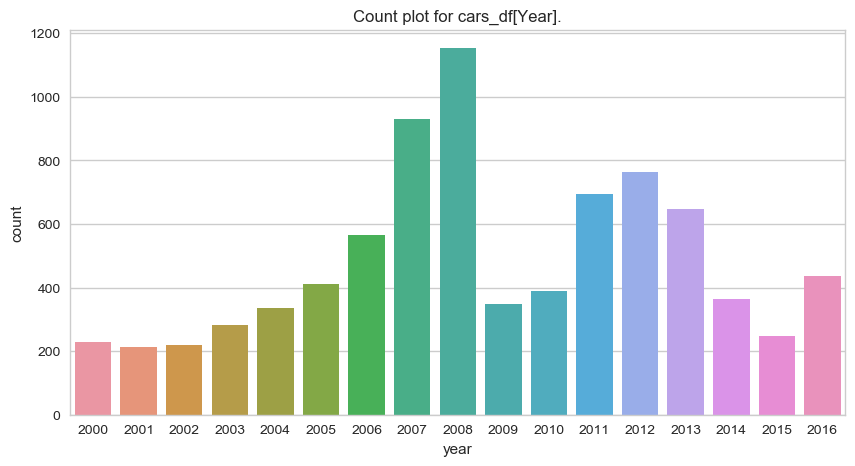

In [138]:
sns.set_style('whitegrid')
sns.countplot(x='year', data=cars_df[(cars_df['price_new'] < 200000) & (cars_df['year'] >= 2000) ]).set_title('Count plot for cars_df[Year].')
#cars_df.set_index('price_new').cars_df['drive'].plot(kind='bar', stacked=True)

#### Highest car sales is in year __2008__, followed by 2007 and 2006

<a id=section509></a>
### 5.9 Comparing top 2 brands sales over years

Text(0,0.5,'Sales')

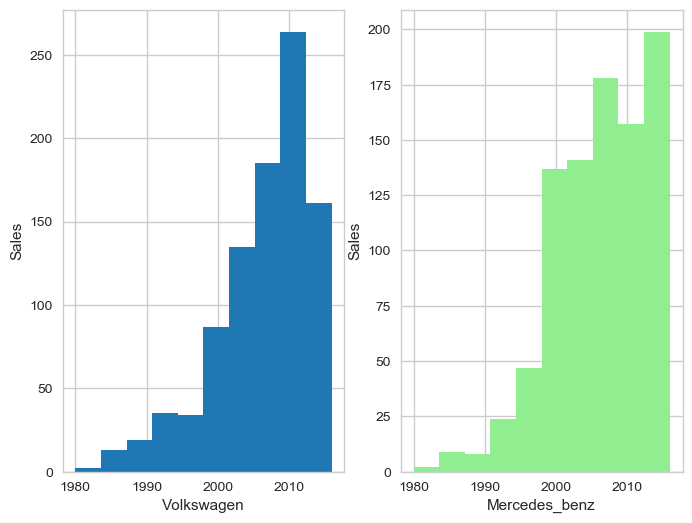

In [150]:
fig, axes = plt.subplots(ncols=2,figsize=(8,6))
volkswagen = cars_df[cars_df.car_new == 'Volkswagen'] 

g=volkswagen['year'].plot(kind='hist',ax=axes[0],bins=10)
g.set_xlabel('Volkswagen')
g.set_ylabel('Sales')

mercedes_benz = cars_df[(cars_df['car_new'] == 'Mercedes-Benz') & (cars_df['year'] >= 1980)]
g=mercedes_benz['year'].plot(kind='hist',ax=axes[1],bins=10,color='lightgreen')
g.set_xlabel('Mercedes_benz')
g.set_ylabel('Sales')

<a id=section510></a>
### 5.10 Understanding co-relation 

Text(0.5,1,'correlation between different variables')

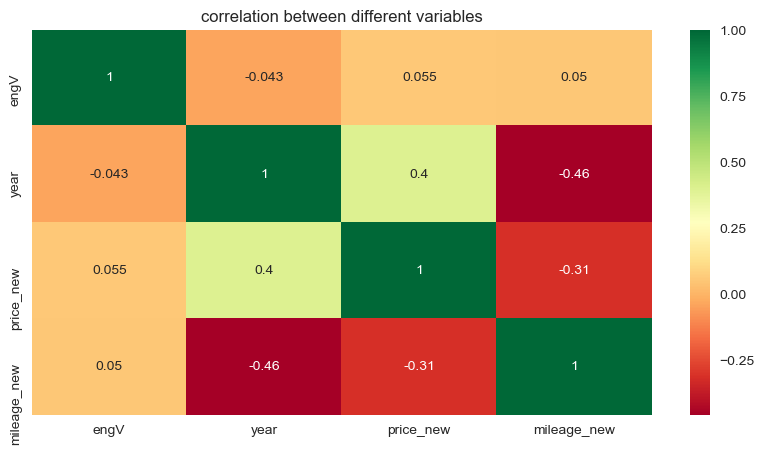

In [151]:
g = sns.heatmap(cars_df.corr(),annot=True,cmap="RdYlGn")
plt.title('correlation between different variables')

- __Year__ and __Price__ are positively co-related


<a id=section511></a>
### 5.11 How is price dependent by 'Body Design' ? 

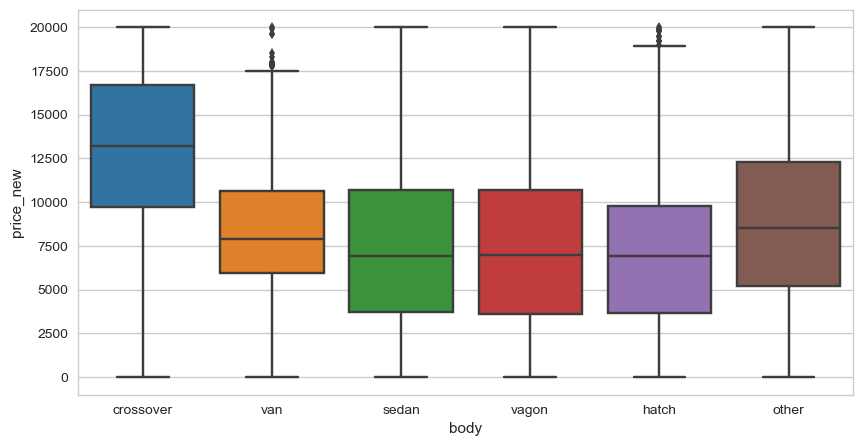

In [153]:
sns.boxplot(x='body', y='price_new', data=cars_df[cars_df['price_new'] < 20000 ])

<a id=section512></a>
### 5.12 How is Mileage changing by Engine Type ?

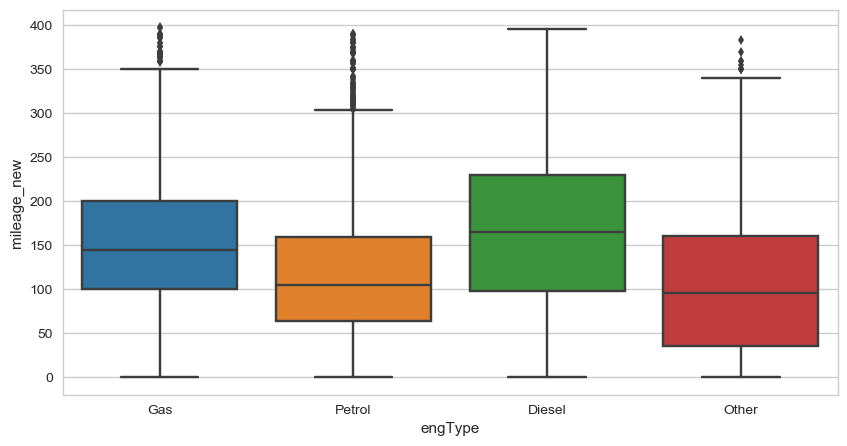

In [121]:
sns.boxplot(x='engType', y='mileage_new', data=cars_df[cars_df['mileage_new']<400])

<a id=section513></a>
### 5.13 Price, year, Mileage ranges and outliers detection

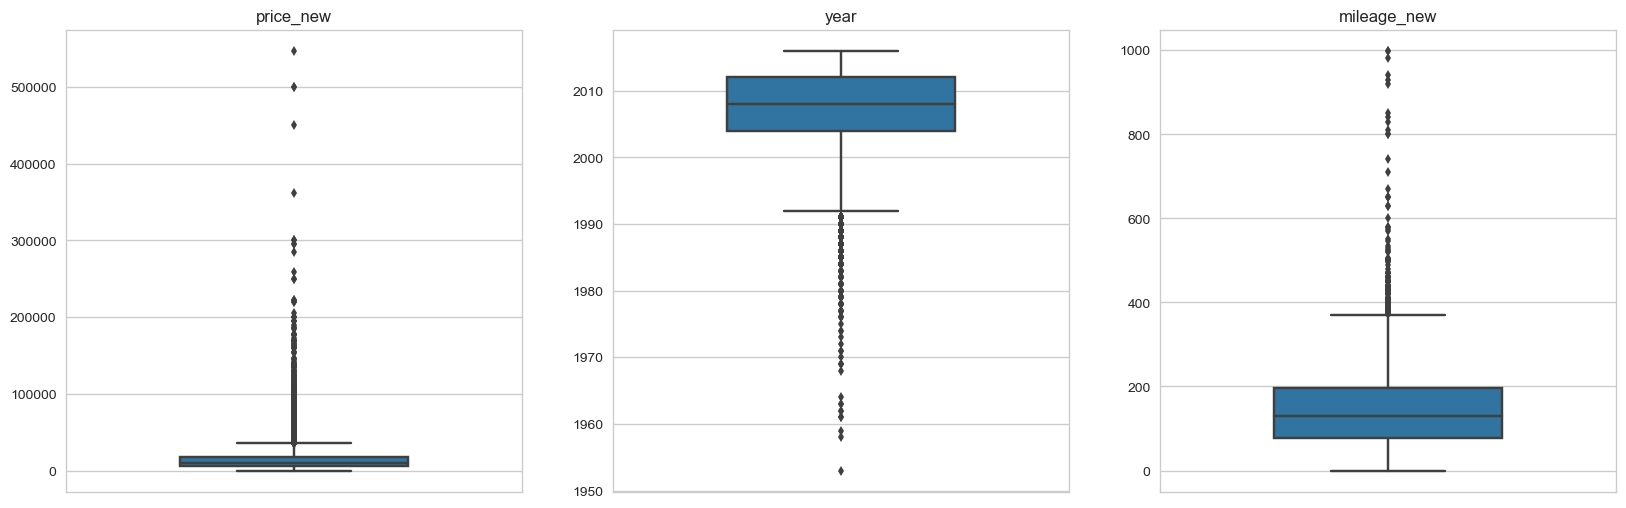

In [165]:
feats = ['price_new', 'year', 'mileage_new']
fig, axes = plt.subplots(ncols=len(feats), nrows=1, figsize=(20,6))

for i, feat in enumerate(feats):
    sns.boxplot(cars_df [feat], ax=axes[i], orient='v', width=0.5);
    axes[i].set_ylabel('')
    axes[i].set_title(feat)

<a id=section514></a>
### 5.14 Closer look at Price, mileage and sales year distribution and ranges

Text(0.5,1,'year')

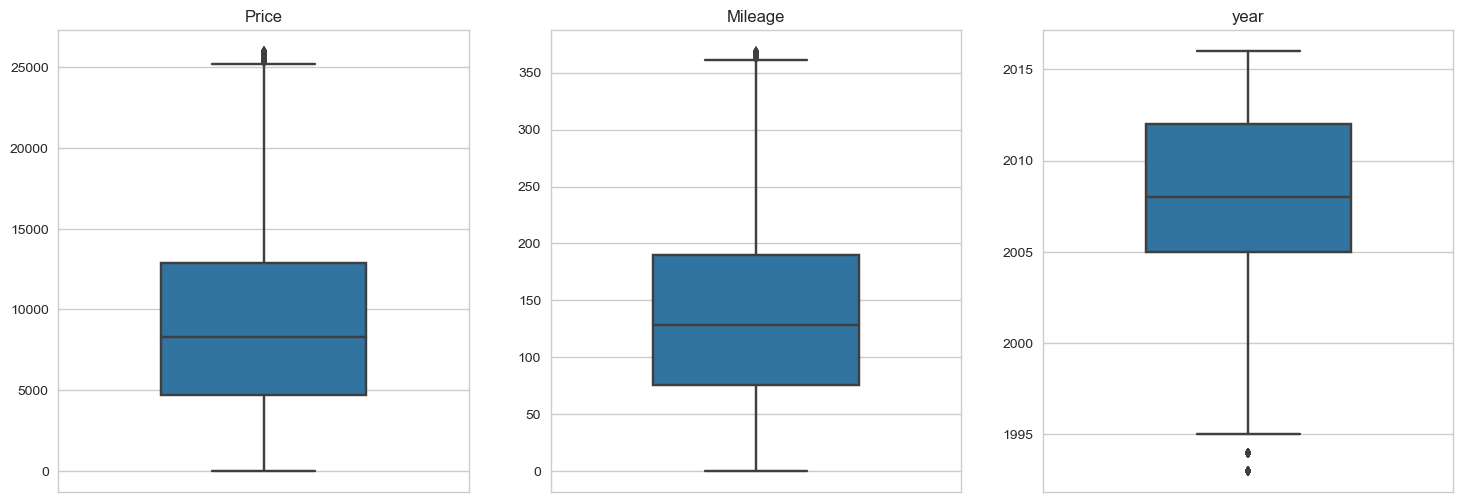

In [182]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))

p = cars_df[cars_df['price_new'] < 26000]
sns.boxplot(p['price_new'], ax=axes[0], orient='v', width=0.5);
axes[0].set_ylabel('')
axes[0].set_title('Price')

p = cars_df[cars_df['mileage_new'] < 370]
sns.boxplot(p['mileage_new'], ax=axes[1], orient='v', width=0.5);
axes[1].set_ylabel('')
axes[1].set_title('Mileage')

p = cars_df[cars_df['year'] > 1992]
sns.boxplot(p['year'], ax=axes[2], orient='v', width=0.5);
axes[2].set_ylabel('')
axes[2].set_title('year')

<a id=section515></a>
### 5.15 How is 'Volkswagen' sales distributed by Drive\ Body design and Engine Type?

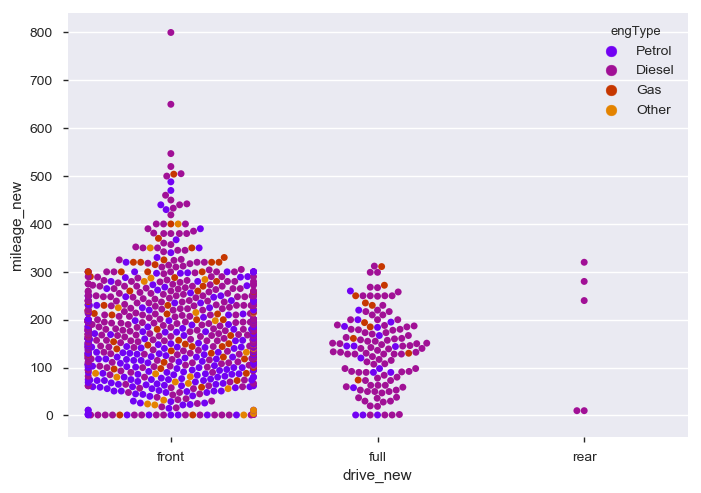

In [60]:
vbd = cars_df[cars_df['car_new'] == 'Volkswagen']
vbd.head()
sns.swarmplot(x="drive_new", y="mileage_new", hue="engType", palette="gnuplot", data=vbd)

#### Volkswagen front drive cars are sold more

<a id=section516></a>
### 5.16 How is 'Volkswagen' mileage distributed by Body design\ Engine Type ?

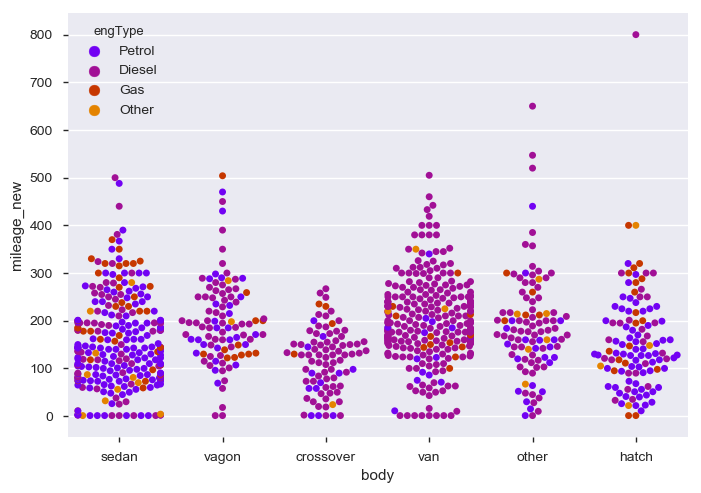

In [63]:
m = cars_df[cars_df['car_new'] == 'Volkswagen']
m.head()
sns.swarmplot(x="body", y="mileage_new", hue="engType", palette="gnuplot", data=vbd)

<a id=section600></a>
### 6.Conclusion

- This EDA helps to understand the various sales patterns
    - Sedan, Front drive and Petrol engine type are the most in-demend cars.
    - Year 2008 marked the highest sales
    - Volkswagen and Mercedes-Benz are the top 2 car brands sold
- Car prices are growing exponentially over years
- 'Cross-over' design is the most expensive car by design
- 'Diesel' engines have highest mileage
- Volkswagen has highest sales in van with front drive and diesel engine type


    